<a href="https://colab.research.google.com/github/mathemakitten/fastai-colab/blob/master/sgd_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents
 <p>

In [0]:
%matplotlib inline

import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *

rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [0]:
def lin(a,b,x): 
  return a*x+b

In [0]:
a=3.
b=8.

In [0]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([0.8551, 0.9238, 0.1991, 0.4753, 0.8448, 0.3248, 0.3257, 0.816 , 0.8407, 0.6744, 0.4671,
       0.6966, 0.7838, 0.9679, 0.0215, 0.5888, 0.764 , 0.9527, 0.1645, 0.6716, 0.2499, 0.3011,
       0.0886, 0.5653, 0.6818, 0.9653, 0.6647, 0.0141, 0.5718, 0.3037])

In [6]:
y

array([10.5653, 10.7714,  8.5973,  9.4258, 10.5344,  8.9744,  8.9772, 10.448 , 10.5221, 10.0232,
        9.4014, 10.0897, 10.3515, 10.9036,  8.0646,  9.7664, 10.292 , 10.8582,  8.4934, 10.0147,
        8.7497,  8.9033,  8.2658,  9.6959, 10.0453, 10.8959,  9.9942,  8.0422,  9.7155,  8.911 ])

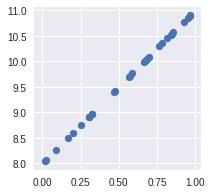

In [7]:
plt.scatter(x,y)

In [0]:
def sse(y,y_pred): 
  return ((y-y_pred)**2).sum()

def loss(y,a,b,x): 
  return sse(y, lin(a,b,x))

def avg_loss(y,a,b,x): 
  return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.3084

In [0]:
lr=0.01

# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [0]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani